In [1]:
import numpy as np
import pandas as pd
import collections

In [2]:
data=pd.read_csv('iris.data',header=None)
x,y=data.shape
r,c=x,y

In [3]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
lis=data.iloc[:,4].unique()
dict={}
count=0
for i in lis:
    dict[i]=count
    count+=1
dict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [5]:
for i in range(0,x):
    data.iloc[i,4]=dict[data.iloc[i,4]]
data.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [6]:
cl=np.random.randint(3,10)
k=[]
for i in range(0,100):
    c=np.random.randint(0,149)
    if c not in k:
        k.append(c)
    if len(k)==cl:
        break
len(k)

9

In [7]:
data1=data.to_numpy()
data1.shape

(150, 5)

In [8]:
print(k)
means_prev=[]
for i in k:
    means_prev.append(data1[i,:5])
print(means_prev)
l1=np.ones((150,1))
for i in k:
    l=np.sqrt(np.sum((data1[i]-data1)**2,axis=1))
    l1=np.hstack((l1,l.reshape(-1,1)))
l=np.argmin(l1[:,1:],axis=1)
print(l)
data1=np.hstack((data1,l.reshape(-1,1)))
x=data1[data1[:,5]==0]
x.shape
len(collections.Counter(l))

[114, 116, 15, 53, 105, 135, 40, 133, 103]
[array([5.8, 2.8, 5.1, 2.4, 2. ]), array([6.5, 3. , 5.5, 1.8, 2. ]), array([5.7, 4.4, 1.5, 0.4, 0. ]), array([5.5, 2.3, 4. , 1.3, 1. ]), array([7.6, 3. , 6.6, 2.1, 2. ]), array([7.7, 3. , 6.1, 2.3, 2. ]), array([5. , 3.5, 1.3, 0.3, 0. ]), array([6.3, 2.8, 5.1, 1.5, 2. ]), array([6.3, 2.9, 5.6, 1.8, 2. ])]
[6 6 6 6 6 2 6 6 6 6 6 6 6 6 2 2 6 6 2 6 6 6 6 6 6 6 6 6 6 6 6 6 2 2 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 3 7 3 7 3 7 3 3 3 3 3 3 7 3 3 3 3 7 3 7 3
 3 7 7 7 3 3 3 3 3 7 3 3 7 3 3 3 3 3 3 3 3 3 3 3 3 3 8 0 5 8 1 4 0 4 8 5 1
 1 1 0 0 1 1 4 4 7 1 0 4 7 1 5 7 7 8 1 5 4 8 7 8 5 1 1 7 1 1 1 0 1 1 1 7 1
 1 7]


9

In [9]:
print(l)
count=200
while(count):
    new_means=[]
    for i in range(0,cl):
        x=data1[data1[:,5]==i]
        x=x[:,:5]
        x1,y1=x.shape
        print(x1)
        new_means.append(1/x1*(np.sum(x,axis=0)))
    print(new_means)
    m=0
    for i,j in zip(new_means,means_prev):
        t=0
        for a,b in zip(i,j):
            if a==b:
                t+=1
        if t==5:
            m+=1
    if m==cl:
        print(m)
        break
    else:
        means_prev=new_means
    l1=np.ones((150,1))
    for i in new_means:
        l=np.sqrt(np.sum((i-data1[:,:5])**2,axis=1))
        l1=np.hstack((l1,l.reshape(-1,1)))
    l=np.argmin(l1[:,1:],axis=1)
    print(l)
    data1=np.hstack((data1[:,:5],l.reshape(-1,1)))
    print(count)
    count-=1
data1.shape

[6 6 6 6 6 2 6 6 6 6 6 6 6 6 2 2 6 6 2 6 6 6 6 6 6 6 6 6 6 6 6 6 2 2 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 3 7 3 7 3 7 3 3 3 3 3 3 7 3 3 3 3 7 3 7 3
 3 7 7 7 3 3 3 3 3 7 3 3 7 3 3 3 3 3 3 3 3 3 3 3 3 3 8 0 5 8 1 4 0 4 8 5 1
 1 1 0 0 1 1 4 4 7 1 0 4 7 1 5 7 7 8 1 5 4 8 7 8 5 1 1 7 1 1 1 0 1 1 1 7 1
 1 7]
6
19
6
36
6
5
44
22
6
[array([5.6       , 2.66666667, 4.95      , 1.98333333, 2.        ]), array([6.63157895, 3.12105263, 5.48947368, 2.14210526, 2.        ]), array([5.55      , 4.06666667, 1.5       , 0.26666667, 0.        ]), array([5.70555556, 2.68333333, 4.08055556, 1.25555556, 1.        ]), array([7.65      , 3.15      , 6.6       , 2.06666667, 2.        ]), array([7.32, 3.12, 6.04, 2.12, 2.  ]), array([4.93181818, 3.32954545, 1.45909091, 0.24090909, 0.        ]), array([6.38636364, 2.90454545, 4.80454545, 1.59090909, 1.36363636]), array([6.36666667, 2.81666667, 5.7       , 1.96666667, 2.        ])]
[6 6 6 6 6 2 6 6 6 6 2 6 6 6 2 2 2 6 2 6 6 6 6 6 6 6 6 6 6 6 6 6 2 2 6 6 2
 6 6 

(150, 6)

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
# Points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1[:,0], data1[:,3], data1[:,1] , c=l,cmap='rainbow',marker=',')
ax.set_xlabel('1st Feature')
ax.set_ylabel('2nd Feature')
ax.set_zlabel('3rd Feature')

Text(0.5, 0, '3rd Feature')

In [11]:
comp=np.hstack((l.reshape(-1,1),data1[:,4].reshape(-1,1)))
gr=[0,1,2]
acc=[]
for i in range(0,cl):
    x=comp[comp[:,0]==i]
    t=[]
    for j in gr:
        t.append(len(x[x[:,1]==j]))
    acc.append(t)
acc
count=0
for i in acc:
    i.sort()
    count=count+i[1]+i[2]
print('Accuracy:',(r-count)/r)
l

Accuracy: 0.0


array([6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 2, 6, 6, 6, 2, 2, 2, 6, 2, 2, 2, 2,
       6, 6, 6, 6, 6, 2, 6, 6, 6, 2, 2, 2, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6,
       2, 6, 2, 6, 2, 6, 7, 7, 7, 3, 7, 3, 7, 3, 7, 3, 3, 3, 3, 7, 3, 7,
       3, 3, 7, 3, 7, 3, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 7, 3, 7, 7, 7,
       3, 3, 3, 7, 3, 3, 3, 3, 3, 7, 3, 3, 1, 0, 5, 8, 1, 4, 0, 5, 8, 5,
       1, 8, 1, 0, 0, 1, 8, 4, 4, 0, 1, 0, 4, 0, 1, 5, 0, 0, 8, 5, 5, 4,
       8, 0, 8, 5, 1, 8, 0, 1, 1, 1, 0, 1, 1, 1, 0, 8, 1, 0], dtype=int64)

In [16]:
import numpy as np
import pandas as pd
import collections
data=pd.read_csv('iris.data',header=None)
x,y=data.shape
r,c=x,y
lis=data.iloc[:,4].unique()
dict={}
count=0
for i in lis:
    dict[i]=count
    count+=1
for i in range(0,x):
    data.iloc[i,4]=dict[data.iloc[i,4]]
list=[i for i in range(5,31)]
print(list)
acc2=[]
for cl in list:
    k=[]
    for i in range(0,100):
        c=np.random.randint(0,149)
        if c not in k:
            k.append(c)
        if len(k)==cl:
            break
    data1=data.to_numpy()
    means_prev=[]
    for i in k:
        means_prev.append(data1[i,:5])
    l1=np.ones((150,1))
    for i in k:
        l=np.sqrt(np.sum((data1[i]-data1)**2,axis=1))
        l1=np.hstack((l1,l.reshape(-1,1)))
    l=np.argmin(l1[:,1:],axis=1)
    data1=np.hstack((data1,l.reshape(-1,1)))
    count=200
    while(count):
        new_means=[]
        for i in range(0,cl):
            x=data1[data1[:,5]==i]
            x=x[:,:5]
            x1,y1=x.shape
            print(x1)
            new_means.append(1/x1*(np.sum(x,axis=0)))
        print('end',cl)
        m=0
        for i,j in zip(new_means,means_prev):
            t=0
            for a,b in zip(i,j):
                if a==b:
                    t+=1
            if t==5:
                m+=1
        if m==cl:
            break
        else:
            means_prev=new_means
        l1=np.ones((150,1))
        for i in new_means:
            l=np.sqrt(np.sum((i-data1[:,:5])**2,axis=1))
            l1=np.hstack((l1,l.reshape(-1,1)))
        l=np.argmin(l1[:,1:],axis=1)
        data1=np.hstack((data1[:,:5],l.reshape(-1,1)))
        count-=1
    comp=np.hstack((l.reshape(-1,1),data1[:,4].reshape(-1,1)))
    gr=[0,1,2]
    acc=[]
    for i in range(0,cl):
        x=comp[comp[:,0]==i]
        t=[]
        for j in gr:
            t.append(len(x[x[:,1]==j]))
        acc.append(t)
    acc
    count=0
    for i in acc:
        i.sort(reverse=True)
        count=count+i[1]+i[2]
    acc2.append(((r-count)/r)*100)
acc2

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
30
50
11
36
23
end 5
26
31
22
47
24
end 5
25
21
31
48
25
end 5
24
18
32
50
26
end 5
24
16
34
50
26
end 5
24
15
35
50
26
end 5
24
14
36
50
26
end 5
24
14
36
50
26
end 5
21
12
29
16
35
37
end 6
23
23
27
19
31
27
end 6
23
25
27
22
28
25
end 6
23
25
27
25
25
25
end 6
23
25
27
26
23
26
end 6
23
25
27
27
22
26
end 6
23
25
27
27
22
26
end 6
13
13
50
7
27
23
17
end 7
14
13
50
8
22
27
16
end 7
13
13
50
9
22
27
16
end 7
12
12
50
12
22
27
15
end 7
13
11
50
13
22
27
14
end 7
15
11
50
12
22
27
13
end 7
15
11
50
12
22
27
13
end 7
3
23
17
3
27
38
6
33
end 8
2
19
21
4
31
28
16
29
end 8
3
22
23
4
28
24
19
27
end 8
6
25
23
4
25
23
17
27
end 8
8
26
23
4
23
23
16
27
end 8
11
27
23
4
22
23
13
27
end 8
12
27
23
4
22
23
12
27
end 8
12
27
23
4
22
23
12
27
end 8
38
7
6
12
17
12
7
1
50
end 9
35
7
6
11
14
16
11
1
49
end 9
30
6
5
11
10
21
17
1
49
end 9
28
5
5
11
9
23
19
1
49
end 9
27
6
4
11
8
24
20
1
49
end 9
27
5


[98.66666666666667,
 99.33333333333333,
 99.33333333333333,
 99.33333333333333,
 99.33333333333333,
 100.0,
 100.0,
 100.0,
 100.0,
 99.33333333333333,
 100.0,
 100.0,
 99.33333333333333,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

Text(0, 0.5, 'Accuracy')

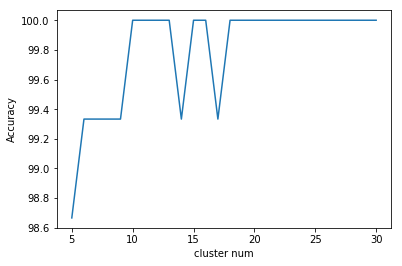

In [17]:
import matplotlib.pyplot as plt
plt.plot(list,acc2)
plt.xlabel('cluster num') 
plt.ylabel('Accuracy') 